In [4]:
import random
from IPython.core.display import SVG
import pyomo.environ as pyo
from pysat.solvers import Solver
from pysat.formula import CNF 
import py_svg_combinatorics as psc
from ipywidgets import widgets, HBox
from collections import Counter
from pprint import pprint
from random import randint
import numpy as np
from IPython.display import IFrame
import IPython
from copy import copy
import os
from pathlib import Path
import networkx as nx
nbname = ''
try:
    nbname = __vsc_ipynb_file__
except:
    if 'COCALC_JUPYTER_FILENAME' in os.environ:
        nbname = os.environ['COCALC_JUPYTER_FILENAME']    
title_ = Path(nbname).stem.replace('-', '_').title()    
IFrame(f'https://discopal.ispras.ru/index.php?title=Hardprob/{title_}&useskin=cleanmonobook', width=1280, height=300)


In [5]:
def visme(G, m=None):
    def norm_size(sz):
        return int(sz*100)

    pos = nx.get_node_attributes(G, "pos")
    if not pos:
        pos = nx.shell_layout(G)
    cut_edges = None 
    v_colors = ['blue'] * len(G.nodes()) # цвета вершин
    if m: # если были переданы данные ответа
        cut_edges = [e for e in m.E if pyo.value(m.y[e])>0]
        val_ = 0
        for v in G.nodes():
            if m.x[v].value is not None:
                val_ = m.x[v].value
            if val_ > 0:
                v_colors[v] = 'green'

    nx.draw_networkx(
        G,
        pos,
        with_labels=True,
        edge_color="green",
        node_color=v_colors,
        node_size=300,
        style=':',
        width=0.4,
        font_size=6
    )

    if cut_edges:
        nx.draw_networkx_edges(
            G,
            pos,
            edgelist=cut_edges,
            edge_color="blue",
            node_size=200,
            width=0.7,
        )


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


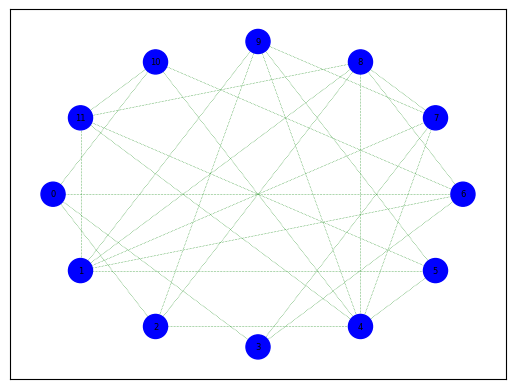

In [6]:
G = nx.fast_gnp_random_graph(12, 0.4)
print(G.nodes())

for (u, v) in G.edges():
    G.edges[u, v]['weight'] = 1 #np.random.rand()

visme(G)